# 1. IMPORT LIBRARYS & DATA


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
from datetime import datetime
data =pd.read_csv("D:/Project_salessupermarket/data_supermarket.csv")


In [30]:
# In ra Dataframe
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [31]:
# In ra info của data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# 2. PROCESS DATA

In [32]:
data=data.drop("gross income", axis=1) #Xoá cột gross income vì cột này mang giá trị = thuế 5%

data=data.drop("gross margin percentage", axis=1) #Xoá cột gross margin percentage vì cột này mang giá trị = nhau


data["Date"]=pd.to_datetime(data["Date"]) #Chuyển đối tượng Date sang kiểu dữ liệu Datetime

data["Time"]=pd.to_timedelta(data["Time"]) #Chuyển đối tượng Time sang kiểu dữ liệu Datetime

data["Datetime"] = data["Date"] + data["Time"] # Merge cột Date và Time thành cột mới tên là Datetime

data=data.drop("Date", axis=1)
data=data.drop("Time", axis=1) #Xoá cột Date và Time khỏi dataframe 

In [33]:
# In ra dataframe sau khi sửa đổi
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,Datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,5.3,2019-02-08 10:37:00


In [34]:
# In ra info của dataframe sau khi sửa đổi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax 5%         1000 non-null   float64       
 9   Total          1000 non-null   float64       
 10  Payment        1000 non-null   object        
 11  cogs           1000 non-null   float64       
 12  Rating         1000 non-null   float64       
 13  Datetime       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 109.5

In [35]:
# Tách đối tượng Months từ cột Datetime và lưu vào cột mới tên là Months
data["Months"]=data["Datetime"].dt.month

# In ra dataframe
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,Datetime,Months
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,9.1,2019-01-05 13:08:00,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,9.6,2019-03-08 10:29:00,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,2019-03-03 13:23:00,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,8.4,2019-01-27 20:33:00,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,5.3,2019-02-08 10:37:00,2


# 3. ANALYST DATA
### 1. Phân tích về doanh thu, chi phí, lợi nhuận từ hoạt động bán hàng

In [36]:
# Xem các thông tin về tổng chi phí (cogs), lợi nhuận (Tax 5%), doanh thu (Total), số lượng bán hàng (Quantity) của từng hạng khách hàng theo từng thành phố
a = data.groupby(["City", "Customer type"]).sum("cogs") 

total_cogs_income = a[["Tax 5%", "cogs", "Total","Quantity"]]

total_cogs_income

Tax 5%      cogs       Total  Quantity
City      Customer type                                           
Mandalay  Member         2557.3660  51147.32  53704.6860       924
          Normal         2499.6660  49993.32  52492.9860       896
Naypyitaw Member         2708.6325  54172.65  56881.2825       897
          Normal         2556.5440  51130.88  53687.4240       934
Yangon    Member         2554.1655  51083.31  53637.4755       964
          Normal         2502.9950  50059.90  52562.8950       895

In [37]:
#Tổng chi phí lợi nhuận theo từng khu vực
Groupby_City = data.groupby(["City"]).sum("cogs") 

GroupbyCity = Groupby_City [["Tax 5%", "cogs", "Total","Quantity"]]

GroupbyCity

,Tax 5%,cogs,Total,Quantity
City,,,,
Mandalay,5057.0320,101140.64,106197.6720,1820
Naypyitaw,5265.1765,105303.53,110568.7065,1831
Yangon,5057.1605,101143.21,106200.3705,1859


In [38]:
print(GroupbyCity["Total"].idxmax()) #In tên của thành phố có doanh thu cao nhất

print(GroupbyCity["cogs"].idxmax())  #In tên của thành phố có chi phí cao nhất

print(GroupbyCity["Tax 5%"].idxmax())  #In tên của thành phố có lợi nhuận cao nhất

Naypyitaw
Naypyitaw
Naypyitaw


In [39]:
#Tổng doanh thu, chi phí, lợi nhuận theo sản phẩm
Groupby_Productline = data.groupby(["Product line"]).sum("cogs") 

GroupbyProductline = Groupby_Productline [["Tax 5%", "cogs", "Total","Quantity"]]

print(GroupbyProductline)

                           Tax 5%      cogs       Total  Quantity
Product line                                                     
Electronic accessories  2587.5015  51750.03  54337.5315       971
Fashion accessories     2585.9950  51719.90  54305.8950       902
Food and beverages      2673.5640  53471.28  56144.8440       952
Health and beauty       2342.5590  46851.18  49193.7390       854
Home and lifestyle      2564.8530  51297.06  53861.9130       911
Sports and travel       2624.8965  52497.93  55122.8265       920


In [40]:
print(GroupbyProductline["Total"].idxmax()) #In tên của sản phẩm có doanh thu cao nhất

print(GroupbyProductline["cogs"].idxmax())  #In tên của sản phẩm có chi phí cao nhất

print(GroupbyProductline["Tax 5%"].idxmax())  #In tên của sản phẩm có lợi nhuận cao nhất


Food and beverages
Food and beverages
Food and beverages


In [41]:
#Tổng doanh thu, chi phí, lợi nhuận theo hạng khách hàng
Groupby_customertype = data.groupby(["Customer type"]).sum("cogs") 

Groupbycustomertype = Groupby_customertype [["Tax 5%", "cogs", "Total","Quantity"]]

print(Groupbycustomertype)

                 Tax 5%       cogs       Total  Quantity
Customer type                                           
Member         7820.164  156403.28  164223.444      2785
Normal         7559.205  151184.10  158743.305      2725


In [42]:
print(Groupbycustomertype["Total"].idxmax()) #In tên của hạng khách hàng có doanh thu cao nhất

print(Groupbycustomertype["cogs"].idxmax())  #In tên của hạng khách hàng có chi phí cao nhất

print(Groupbycustomertype["Tax 5%"].idxmax())  #In tên của hạng khách hàng có lợi nhuận cao nhất

Member
Member
Member


In [43]:
#Đếm số lượng hoá đơn của mỗi thành phố
Counid_city=data.groupby(["City"]).count() 

print(Counid_city["Invoice ID"])

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Invoice ID, dtype: int64


In [44]:
#Đếm số lượng hoá đơn của mỗi sản phẩm
Counid_productline=data.groupby(["Product line"]).count() 

print(Counid_productline["Invoice ID"])

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Invoice ID, dtype: int64


In [45]:
#Đếm số lượng hoá đơn của mỗi hạng khách hàng
Counid_customer=data.groupby(["Customer type"]).count() 

print(Counid_customer["Invoice ID"])

Customer type
Member    501
Normal    499
Name: Invoice ID, dtype: int64


In [46]:
#Đếm số lượng hoá đơn của từng mặt hàng của mỗi thành phố
CountID = data.groupby(["City", "Product line"]).count() 

print(CountID["Invoice ID"])

City       Product line          
Mandalay   Electronic accessories    55
           Fashion accessories       62
           Food and beverages        50
           Health and beauty         53
           Home and lifestyle        50
           Sports and travel         62
Naypyitaw  Electronic accessories    55
           Fashion accessories       65
           Food and beverages        66
           Health and beauty         52
           Home and lifestyle        45
           Sports and travel         45
Yangon     Electronic accessories    60
           Fashion accessories       51
           Food and beverages        58
           Health and beauty         47
           Home and lifestyle        65
           Sports and travel         59
Name: Invoice ID, dtype: int64


In [47]:
#Tìm ra sản phẩm ứng với thành phố có số lượng hoá đơn nhiều nhất
max_invoice_id = CountID["Invoice ID"].max()

loc = CountID[CountID["Invoice ID"] == max_invoice_id] 

print(loc["Invoice ID"])

City       Product line      
Naypyitaw  Food and beverages    66
Name: Invoice ID, dtype: int64


In [48]:
#Tìm tổng chi phí, lợi nhuận, doanh thu của từng mặt hàng của từng thành phố
sum_cog_product= data.groupby(["City","Product line"]).sum("cogs") 

sum_cog_product=sum_cog_product[["Tax 5%", "cogs", "Total","Quantity"]]

sum_cog_product

Tax 5%      cogs       Total  Quantity
City      Product line                                                     
Mandalay  Electronic accessories   811.9735  16239.47  17051.4435       316
          Fashion accessories      781.5865  15631.73  16413.3165       297
          Food and beverages       724.5185  14490.37  15214.8885       270
          Health and beauty        951.4600  19029.20  19980.6600       320
          Home and lifestyle       835.6745  16713.49  17549.1645       295
          Sports and travel        951.8190  19036.38  19988.1990       322
Naypyitaw Electronic accessories   903.2845  18065.69  18968.9745       333
          Fashion accessories     1026.6700  20533.40  21560.0700       342
          Food and beverages      1131.7550  22635.10  23766.8550       369
          Health and beauty        791.2060  15824.12  16615.3260       277
          Home and lifestyle       661.6930  13233.86  13895.5530       245
          Sports and travel        750.5680  15011.36  15761.9280       265
Yangon    Electronic accessories   872.2435  17444.87  18317.1135       322
          Fashion accessories      777.7385  15554.77  16332.5085       263
          Food and beverages       817.2905  16345.81  17163.1005       313
          Health and beauty        599.8930  11997.86  12597.7530       257
          Home and lifestyle      1067.4855  21349.71  22417.1955       371
          Sports and travel        922.5095  18450.19  19372.6995       333

In [49]:
# Tìm mặt hàng nào ứng với thành phố nào có lợi nhuận cao nhất

max_income=sum_cog_product["Tax 5%"].max()

loc_max_income=sum_cog_product[sum_cog_product["Tax 5%"] == max_income] 

print(loc_max_income["Tax 5%"])

City       Product line      
Naypyitaw  Food and beverages    1131.755
Name: Tax 5%, dtype: float64


In [50]:
#Đếm số lượng hoá đơn của từng mặt hàng của mỗi hạng khách hàng

CountID_Member_Productline = data.groupby(["Customer type", "Product line"]).count() 

CountID_Member_Productline["Invoice ID"] 

Customer type  Product line          
Member         Electronic accessories    78
               Fashion accessories       86
               Food and beverages        94
               Health and beauty         73
               Home and lifestyle        83
               Sports and travel         87
Normal         Electronic accessories    92
               Fashion accessories       92
               Food and beverages        80
               Health and beauty         79
               Home and lifestyle        77
               Sports and travel         79
Name: Invoice ID, dtype: int64

In [51]:
#Tìm ra hạng khách hàng ứng với loại mặt hàng có số lượng hoá đơn nhiều nhất

max_invoice_id_members = CountID_Member_Productline["Invoice ID"].max()

loc_max_invoice_id_members = CountID_Member_Productline[CountID_Member_Productline["Invoice ID"] == max_invoice_id_members] 

loc_max_invoice_id_members["Invoice ID"]

Customer type  Product line      
Member         Food and beverages    94
Name: Invoice ID, dtype: int64

In [52]:
#Tìm tổng chi phí, lợi nhuận của từng mặt hàng của từng hạng khách hàng

sum_cog_product_members= data.groupby(["Customer type","Product line"]).sum("cogs") 

sum_cog_product_members=sum_cog_product_members[["Tax 5%", "cogs", "Total","Quantity"]]

sum_cog_product_members

Tax 5%      cogs       Total  \
Customer type Product line                                              
Member        Electronic accessories  1166.5950  23331.90  24498.4950   
              Fashion accessories     1253.5220  25070.44  26323.9620   
              Food and beverages      1493.2200  29864.40  31357.6200   
              Health and beauty       1230.0495  24600.99  25831.0395   
              Home and lifestyle      1332.2870  26645.74  27978.0270   
              Sports and travel       1344.4905  26889.81  28234.3005   
Normal        Electronic accessories  1420.9065  28418.13  29839.0365   
              Fashion accessories     1332.4730  26649.46  27981.9330   
              Food and beverages      1180.3440  23606.88  24787.2240   
              Health and beauty       1112.5095  22250.19  23362.6995   
              Home and lifestyle      1232.5660  24651.32  25883.8860   
              Sports and travel       1280.4060  25608.12  26888.5260   

                                      Quantity  
Customer type Product line                      
Member        Electronic accessories       429  
              Fashion accessories          439  
              Food and beverages           506  
              Health and beauty            428  
              Home and lifestyle           490  
              Sports and travel            493  
Normal        Electronic accessories       542  
              Fashion accessories          463  
              Food and beverages           446  
              Health and beauty            426  
              Home and lifestyle           421  
              Sports and travel            427

In [53]:
# Tìm mặt hàng nào ứng với hạng khách hàng nào nào có lợi nhuận cao nhất

max_income_members=sum_cog_product_members["Tax 5%"].max()

loc_max_income_members=sum_cog_product_members[sum_cog_product_members["Tax 5%"] == max_income_members] 

print(loc_max_income_members["Tax 5%"])

Customer type  Product line      
Member         Food and beverages    1493.22
Name: Tax 5%, dtype: float64


In [54]:
# Thống kê mô tả lợi nhuận bán hàng
Describe_income= data["Tax 5%"].describe()

Describe_income

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64

In [55]:
#In ra tất cả thông tin ứng với mức lợi nhuận cao nhất
max_income_statistic=data["Tax 5%"].max()

loc_maxincome_statistic=data[data["Tax 5%"] == max_income_statistic]

loc_maxincome_statistic

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,Datetime,Months
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,Credit card,993.0,6.6,2019-02-15 14:53:00,2


In [56]:
#In ra tất cả thông tin của mức lợi nhuận thấp nhất
min_income_stactistic=data["Tax 5%"].min()

loc_minincome_statistic=data[data["Tax 5%"] == min_income_stactistic]

loc_minincome_statistic

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,Datetime,Months
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,Cash,10.17,5.9,2019-02-07 14:15:00,2


In [57]:
#Tổng hợp lợi nhuận theo tháng

income_groupby_months=data.groupby(["Months"]).sum("Tax 5%") 

income_groupby_months["Tax 5%"]

Months
1    5537.708
2    4629.494
3    5212.167
Name: Tax 5%, dtype: float64

#### KẾT LUẬN TỔNG QUAN VỀ DOANH THU, CHI PHÍ SẢN PHẨM
* Hạng khách hàng có chi phí cao nhất: Members, lợi nhuận cao nhất: Members
* Sản phẩm có doanh thu, chi phí, lợi nhuận cao nhất: Food and beverages
* Thành phố có doanh thu, chi phí, lợi nhuận cao nhất: Naypyitaw
* Thành phố Yangon có số lượng hoá đơn nhiều nhất, mặt hàng Fashion accessories có số lượng hoá đơn nhiều nhất, hạng khách hàng Members có số lượng hoá đơn nhiều nhất
* Thành phố Napyitaw có mặt hàng là Food and beverages đạt đượt nhiều hoá đơn nhất (được phân loại theo từng thành phố và từng mặt hàng), và có lợi nhuận cao nhất
* Loại sản phẩm Food and beverages được hạng khách hàng Members ưa chuộng nhất vì có nhiều hoá đơn nhất và lợi nhuận cao nhất (Phân loại theo hạng khách hàng và loại sản phẩm)
* Tất cả thông tin về mức lợi nhuận cao nhất thuộc về hoá đơn 860-79-0874, mức lợi nhuận thấp nhất thuộc về hoá đơn 784-21-9238
* Tháng 1 đạt mức lợi nhuận cao nhất, tháng 2 đạt mức lợi nhuận thấp nhất xét bối cảnh tại sao tháng 1 lại có mức lợi nhuận cao như thế, tại sao tháng 2 lại đạt mức lợi nhuận thấp như thế, có yếu tố nào ảnh hưởng đến mức lợi nhuận đó không



### 2. Phân tích về lượt đánh giá của khách hàng

In [58]:
#In ra lượt đánh giá trung bình của từng thành phố

Rating_city=data.groupby(["City"]).mean("Rating")

Rating_city["Rating"] 

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

In [59]:
#In ra lượt đánh giá trung bình của từng từng mặt hàng
Rating_product=data.groupby(["Product line"]).mean("Rating")

Rating_product["Rating"]

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

In [60]:
#Xem thống kê mô tả mức đánh giá của khách hàng
stactisticrating=data["Rating"].describe() 

stactisticrating

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

In [61]:
min_rating = data["Rating"].min()

loc_minrating = data[data["Rating"] == min_rating] # Lấy tất cả thông tin của lượt đánh giá thấp nhất

loc_minrating #Xem tất cả thông tin của những hoá đơn có lượt đánh giá thấp nhất



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,Datetime,Months
72,510-95-6347,B,Mandalay,Member,Female,Food and beverages,48.52,3,7.2780,152.8380,Ewallet,145.56,4.0,2019-03-05 18:17:00,3
85,730-50-9884,C,Naypyitaw,Normal,Female,Sports and travel,83.06,7,29.0710,610.4910,Ewallet,581.42,4.0,2019-03-05 14:31:00,3
226,836-82-5858,B,Mandalay,Member,Male,Health and beauty,69.37,9,31.2165,655.5465,Ewallet,624.33,4.0,2019-01-26 19:14:00,1
328,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,Credit card,204.52,4.0,2019-01-25 10:11:00,1
379,182-69-8360,B,Mandalay,Normal,Female,Electronic accessories,23.65,4,4.7300,99.3300,Credit card,94.60,4.0,2019-01-30 13:32:00,1
618,828-46-6863,A,Yangon,Member,Male,Food and beverages,98.53,6,29.5590,620.7390,Credit card,591.18,4.0,2019-01-23 11:22:00,1
643,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.0080,609.1680,Credit card,580.16,4.0,2019-03-30 19:26:00,3
672,576-31-4774,B,Mandalay,Normal,Female,Health and beauty,73.41,3,11.0115,231.2415,Ewallet,220.23,4.0,2019-03-02 13:10:00,3
790,651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,Credit card,46.41,4.0,2019-03-03 20:06:00,3
848,845-94-6841,C,Naypyitaw,Member,Female,Food and beverages,72.88,9,32.7960,688.7160,Cash,655.92,4.0,2019-01-08 19:38:00,1


In [62]:
#Đếm thử có bao nhiêu hoá đơn có đánh giá thấp nhất trong mỗi thành phố
group_minrating_city = loc_minrating.groupby(["City"]).count()

group_minrating_city["Invoice ID"] 

City
Mandalay     5
Naypyitaw    4
Yangon       2
Name: Invoice ID, dtype: int64

In [63]:
max_rating=data["Rating"].max()

loc_maxrating = data[data["Rating"] == max_rating] # Lấy tất cả thông tin của lượt đánh giá cao nhất

loc_maxrating #Xem tất cả thông tin của những hoá đơn có lượt đánh giá cao nhất


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,Datetime,Months
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,Credit card,74.22,10.0,2019-02-15 17:47:00,2
62,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,Ewallet,495.63,10.0,2019-02-03 13:40:00,2
159,423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,Ewallet,560.34,10.0,2019-03-27 19:18:00,3
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,Credit card,323.20,10.0,2019-02-20 16:49:00,2
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,Ewallet,527.90,10.0,2019-02-25 11:58:00,2


In [64]:
#Đếm thử có bao nhiêu hoá đơn có đánh giá cao nhất trong mỗi thành phố
group_maxrating_city=loc_maxrating.groupby(["City"]).count()

group_maxrating_city["Invoice ID"]

City
Mandalay     3
Naypyitaw    1
Yangon       1
Name: Invoice ID, dtype: int64

#### KẾT LUẬN TỔNG QUAN VỀ ĐÁNH GIÁ CỦA KHÁCH HÀNG
* Thành phố Naypyitaw có lượt đánh giá trung bình cao nhất
* Sản phẩm Food and beverages có lượt đánh giá trung bình cao nhất
* Mức đánh giá trung bình là 6.97, lượt đánh giá thấp nhất là 4, lượt đánh giá cao nhất là 10
* Thành phố Mandalay có 5 lượt đánh giá 4 sao (thấp nhất), Naypyitaw có 4 lượt đánh giá 4 sao, Yangon có 2 lượt đánh giá 4 sao
* Có 5 hoá đơn có lượt đánh giá cao nhất (10 rating), trong đó Mandalay có 3 hoá đơn, Naypyitaw và Yangon có 1 hoá đơn


### 3. Phân tích về phân khúc giới tính khách hàng

In [65]:
# Xem thử đối với từng loại sản phẩm, khách hàng là nữ hay nam sẽ có xu hướng tiêu thụ nhiều hơn
Gender_product = data.groupby(["Gender", "Product line"]).sum("Quantity")

Genderproduct = Gender_product[["Quantity"]]

Genderproduct

Quantity
Gender Product line                    
Female Electronic accessories       488
       Fashion accessories          530
       Food and beverages           514
       Health and beauty            343
       Home and lifestyle           498
       Sports and travel            496
Male   Electronic accessories       483
       Fashion accessories          372
       Food and beverages           438
       Health and beauty            511
       Home and lifestyle           413
       Sports and travel            424

In [66]:
#Xem thử lợi nhuận thu được từ khách hàng nam hay nữ cao hơn

Gender_income=data.groupby(["Gender"]).sum("Tax 5%")

Genderincome = Gender_income[["Tax 5%"]]

Genderincome

,Tax 5%
Gender,
Female,7994.425
Male,7384.944


#### KẾT LUẬN TỔNG QUAN VỀ PHÂN TÍCH PHÂN KHÚC GIỚI TÍNH KHÁCH HÀNG
* Đối với mặt hàng Electronic accessories, Fashion accessories,Food and beverages, Home and lifestyle, Sports and travel: khách hàng nữ tiêu thụ nhiều hơn khách hàng nam
* Đối với mặt hàng Health and beauty: khách hàng nam tiêu thụ nhiều hơn khách hàng nữ
* Lợi nhuận thu được từ khách hàng là nữ nhiều hơn khách hàng là nam

### 4. Phân tích về ngày, giờ bán hàng 

In [67]:
# Xem thống kê mô tả về ngày/tháng/năm và giờ
data["Datetime"].describe()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax 5%         1000 non-null   float64       
 9   Total          1000 non-null   float64       
 10  Payment        1000 non-null   object        
 11  cogs           1000 non-null   float64       
 12  Rating         1000 non-null   float64       
 13  Datetime       1000 non-null   datetime64[ns]
 14  Months         1000 non-null   int32         
dtypes: datetime64[ns](1), 

In [68]:
# Tạo một cột Hour để tách giờ mua hàng của khách hàng ra từ cột Datetime

data["Hour"]=data["Datetime"].dt.hour



In [69]:
# Tạo một function để chuyển đổi thời gian sang AM và PM
def time_type(time):

    if time >=7 and time <=12:
        return "AM"
    else:
        return "PM"

data["Time"] = data["Hour"].apply(lambda x: time_type(x))

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,Datetime,Months,Hour,Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,9.1,2019-01-05 13:08:00,1,13,PM
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,9.6,2019-03-08 10:29:00,3,10,AM
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,2019-03-03 13:23:00,3,13,PM
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,8.4,2019-01-27 20:33:00,1,20,PM
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,5.3,2019-02-08 10:37:00,2,10,AM


In [70]:
# Phân tích doanh thu, chi phí, lợi nhuận theo múi giờ
income_time = data.groupby(["Time"]).sum("Tax %")

incometime=income_time[["Quantity", "Tax 5%", "Total", "cogs"]]

incometime




,Quantity,Tax 5%,Total,cogs
Time,,,,
AM,1539,4184.033,87864.693,83680.66
PM,3971,11195.336,235102.056,223906.72


In [71]:
# Phân tích doanh thu, chi phí, lợi nhuận theo múi giờ của từng thành phố
income_time_city = data.groupby(["Time", "City"]).sum("Tax %")

incometimecity=income_time_city[["Quantity", "Tax 5%", "Total", "cogs"]]

incometimecity

Quantity     Tax 5%       Total      cogs
Time City                                                
AM   Mandalay        493  1324.9080  27823.0680  26498.16
     Naypyitaw       483  1333.2500  27998.2500  26665.00
     Yangon          563  1525.8750  32043.3750  30517.50
PM   Mandalay       1327  3732.1240  78374.6040  74642.48
     Naypyitaw      1348  3931.9265  82570.4565  78638.53
     Yangon         1296  3531.2855  74156.9955  70625.71

In [72]:
# Thống kê mô tả lợi nhuận theo buổi sáng (AM)
data_AM = data[data["Time"] == "AM"] #Tạo một chuỗi giá trị gồm tất cả thông tin bán hàng vào buổi sáng

DescribeAM = data_AM["Tax 5%"].describe()

DescribeAM



count    280.000000
mean      14.942975
std       11.700782
min        0.627000
25%        5.382750
50%       10.701250
75%       22.443750
max       45.325000
Name: Tax 5%, dtype: float64

In [73]:
# Thống kê mô tả lợi nhuận theo buổi chiều (PM)
data_PM = data[data["Time"] == "PM"] #Tạo một chuỗi giá trị gồm tất cả thông tin bán hàng vào buổi chiều

DescribePM = data_PM["Tax 5%"].describe() 

DescribePM

count    720.000000
mean      15.549078
std       11.715688
min        0.508500
25%        6.296375
50%       12.542000
75%       22.469500
max       49.650000
Name: Tax 5%, dtype: float64

In [74]:
# In ra số hoá đơn theo buổi (AM và PM)
Invoice_AM = data_AM["Invoice ID"].count()

Invoice_PM = data_PM["Invoice ID"].count()

print(Invoice_AM)
print(Invoice_PM)


280
720


#### KẾT LUẬN TỔNG QUAN VỀ PHÂN TÍCH DOANH THU, LỢI NHUẬN THEO MÚI GIỜ
* Cả doanh thu, chi phí, lợi nhuận của buổi chiều đều có giá trị vượt trội hơn nhiều so với buổi sáng
* Lợi nhuận vào buổi sáng có giá trị lớn nhất là 45.32 và giá trị nhỏ nhất là 0.62, lợi nhuận vào buổi chiều có giá trị lớn nhất là 49.65 và giá trị nhỏ nhất là 0.5. Nếu chỉ thống kê riêng giá trị lợi nhuận của từng buổi thì ta có thể thấy giữa 2 giá trị nào không có sự chênh lệch lớn. Tuy nhiên, khi đếm số hoá đơn của riêng từng buổi: buổi sáng có 280 hoá đơn, buổi chiều có 720 hoá đơn ==> Điều này cho thấy sự chênh lệch về lợi nhuận giữa 2 buổi chủ yếu do sự chênh lệch về số hoá đơn được bán ra.

### 5. Phân tích sự ảnh hưởng của tổng thu nhập, chi phí, số lượng hàng bán và giá bán đến lợi nhuận của từng loại hàng hoá
(Sử dụng mô hình Linear Regression)

##### Phân tích doanh thu hàng ngày cho mặt hàng Sports and travel

In [75]:

data["Date"]=data["Datetime"].dt.date
# Lấy tổng doanh thu, chi phí, giá bán, số lượng hàng bán để phân tích xem các yếu tố ảnh hưởng đến lợi nhuận như thế nào
Sportandtravle = data[data["Product line"] == "Sports and travel"].groupby(["Date"]).sum("cogs")

X = Sportandtravle[["Total","cogs","Quantity","Unit price"]]
X = X.values #Chuyển dataFrame thành array
Y = Sportandtravle[["Tax 5%"]]
Y = Y.values #Chuyển dataFrame thành array
modelSport = LinearRegression().fit (X,Y) 

R_square = modelSport.score(X,Y) #Hệ số xác định 

Intercept = modelSport.intercept_ #Hệ số chặn (hệ số tự do)

Coef = modelSport.coef_ #Hệ số góc 

Predict_value = modelSport.predict(X) #Dự đoán giá trị lợi nhuận dựa trên dữ liệu input của tổng doanh thu, chi phí, số lượng sản phẩm,....(các giá trị độc lập)

print(f"intercept: {modelSport.intercept_}") #Con số này có ý nghĩa là: Khi các giá trị độc lập bằng 0 thì lợi nhuận bằng 0
print(f"coef: {modelSport.coef_}") #Từng hệ số ứng với hệ số góc của từng biến độc lập
print(f"Predict: {Predict_value}") # Giá trị dự đoán

intercept: [0.]
coef: [[ 1.11526145e-03  4.88289755e-02 -8.38164950e-17 -9.01258960e-18]]
Predict: [[ 54.447 ]
 [ 28.1805]
 [  4.669 ]
 [  6.963 ]
 [ 13.685 ]
 [ 30.8335]
 [ 24.319 ]
 [ 52.46  ]
 [ 70.304 ]
 [ 25.182 ]
 [ 26.895 ]
 [ 37.733 ]
 [  1.7405]
 [ 34.801 ]
 [ 48.625 ]
 [ 46.5155]
 [ 67.5015]
 [ 59.0525]
 [ 25.9   ]
 [  4.9065]
 [ 44.9   ]
 [ 84.609 ]
 [ 41.7825]
 [ 35.315 ]
 [ 15.2425]
 [ 67.5195]
 [ 30.4645]
 [  8.759 ]
 [ 38.4575]
 [ 24.332 ]
 [ 20.608 ]
 [ 74.3805]
 [ 10.765 ]
 [ 12.929 ]
 [  2.7875]
 [107.813 ]
 [ 11.12  ]
 [  6.968 ]
 [ 18.952 ]
 [  7.163 ]
 [  8.143 ]
 [ 27.7255]
 [  8.1265]
 [ 25.955 ]
 [ 88.934 ]
 [ 22.428 ]
 [ 15.995 ]
 [  9.88  ]
 [ 45.6665]
 [ 20.4365]
 [ 17.385 ]
 [ 30.4595]
 [ 21.8305]
 [ 16.8175]
 [ 74.3795]
 [  4.319 ]
 [ 63.941 ]
 [ 69.1955]
 [ 89.4265]
 [ 19.531 ]
 [ 22.4595]
 [ 53.988 ]
 [  7.288 ]
 [ 56.5745]
 [ 50.732 ]
 [ 49.9335]
 [ 54.813 ]
 [  8.315 ]
 [ 44.658 ]
 [ 76.1145]
 [  9.898 ]
 [ 86.5945]
 [  7.75  ]
 [  9.8675]
 [  9.331 ]
 

##### Phân tích doanh thu hàng ngày cho mặt hàng Food and beverages

In [76]:


Foodandbeverages = data[data["Product line"] == "Food and beverages"].groupby(["Date"]).sum("cogs")

X = Foodandbeverages[["Total","cogs","Quantity","Unit price"]]
X = X.values 
Y = Foodandbeverages[["Tax 5%"]]
Y = Y.values 
modelFood = LinearRegression().fit (X,Y) 

R_square = modelFood.score(X,Y) 

Intercept = modelFood.intercept_ 

Coef = modelFood.coef_ 

Predict_value = modelFood.predict(X) 

print(f"intercept: {modelFood.intercept_}") 
print(f"coef: {modelFood.coef_}") 
print(f"Predict: {Predict_value}") 

intercept: [3.55271368e-14]
coef: [[2.49702735e-02 2.37812128e-02 8.34181625e-17 9.59136832e-18]]
Predict: [[ 50.763 ]
 [ 12.498 ]
 [  3.56  ]
 [ 54.975 ]
 [ 21.911 ]
 [117.7635]
 [ 22.7205]
 [ 42.09  ]
 [ 11.447 ]
 [ 61.089 ]
 [ 12.737 ]
 [ 65.637 ]
 [ 52.959 ]
 [  7.916 ]
 [ 58.126 ]
 [ 15.2855]
 [  7.215 ]
 [ 74.0805]
 [ 39.0685]
 [ 45.7355]
 [ 51.585 ]
 [  4.0355]
 [ 25.215 ]
 [ 73.5175]
 [ 29.8015]
 [ 54.7365]
 [ 94.455 ]
 [  8.0565]
 [ 37.845 ]
 [ 31.5095]
 [ 53.719 ]
 [ 21.601 ]
 [ 11.1475]
 [ 83.2   ]
 [ 43.55  ]
 [  1.487 ]
 [ 23.767 ]
 [ 52.725 ]
 [  8.687 ]
 [ 55.1665]
 [ 52.645 ]
 [ 71.9695]
 [  1.5205]
 [ 47.379 ]
 [ 10.572 ]
 [ 29.9405]
 [ 18.2985]
 [ 84.433 ]
 [ 24.186 ]
 [ 17.664 ]
 [ 13.304 ]
 [ 45.393 ]
 [ 54.412 ]
 [ 49.145 ]
 [ 21.728 ]
 [  9.979 ]
 [ 12.1425]
 [ 69.4815]
 [ 18.5235]
 [ 14.031 ]
 [ 38.116 ]
 [ 29.594 ]
 [ 62.412 ]
 [ 55.4125]
 [  1.131 ]
 [  8.334 ]
 [ 24.0225]
 [ 17.187 ]
 [ 14.14  ]
 [ 30.0765]
 [ 15.291 ]
 [ 22.907 ]
 [  7.3395]
 [ 42.3085]
 [ 56

##### Phân tích doanh thu hàng ngày cho mặt hàng Home and lifestyle

In [77]:
Homeandlifestyle = data[data["Product line"] == "Home and lifestyle"].groupby(["Date"]).sum("cogs")

X = Homeandlifestyle[["Total","cogs","Quantity","Unit price"]]
X = X.values 
Y = Homeandlifestyle[["Tax 5%"]]
Y = Y.values 
modelHome = LinearRegression().fit (X,Y) 

R_square = modelHome.score(X,Y) 

Intercept = modelHome.intercept_ 

Coef = modelHome.coef_ 

Predict_value = modelHome.predict(X) 

print(f"intercept: {modelHome.intercept_}") 
print(f"coef: {modelHome.coef_}") 
print(f"Predict: {Predict_value}") 

intercept: [7.10542736e-15]
coef: [[1.39275089e-02 3.53761157e-02 1.55646397e-16 2.00484732e-17]]
Predict: [[ 19.036 ]
 [ 35.7175]
 [ 17.77  ]
 [ 53.3265]
 [ 35.998 ]
 [ 20.603 ]
 [ 22.3215]
 [ 11.185 ]
 [ 23.514 ]
 [ 28.956 ]
 [ 66.6245]
 [ 12.1515]
 [ 92.2585]
 [ 79.57  ]
 [ 43.8985]
 [  8.712 ]
 [ 53.402 ]
 [ 82.841 ]
 [ 45.351 ]
 [ 48.051 ]
 [ 34.607 ]
 [ 34.2215]
 [ 19.997 ]
 [  5.11  ]
 [ 41.132 ]
 [ 13.962 ]
 [ 21.8425]
 [  3.7805]
 [ 36.3555]
 [ 43.159 ]
 [ 69.598 ]
 [ 35.655 ]
 [  7.773 ]
 [ 20.1845]
 [ 52.9915]
 [ 20.555 ]
 [ 33.752 ]
 [ 16.622 ]
 [ 45.2405]
 [ 30.19  ]
 [ 32.4265]
 [ 35.516 ]
 [ 10.326 ]
 [  8.0825]
 [ 14.9095]
 [ 58.267 ]
 [ 20.51  ]
 [  3.473 ]
 [100.6155]
 [ 83.6635]
 [ 26.291 ]
 [ 69.054 ]
 [ 30.594 ]
 [ 24.745 ]
 [ 55.522 ]
 [ 18.263 ]
 [ 48.897 ]
 [ 36.478 ]
 [ 23.4995]
 [ 25.564 ]
 [ 28.127 ]
 [ 35.5395]
 [  4.75  ]
 [ 20.57  ]
 [ 35.838 ]
 [ 27.526 ]
 [ 90.323 ]
 [ 15.228 ]
 [ 42.322 ]
 [ 49.148 ]
 [ 69.615 ]
 [  5.5305]
 [  4.434 ]
 [ 10.863 ]
 [ 10

# 6. DATA VISUALIZATION

[Text(0.5, 1.0, 'Doanh thu theo tháng của các mặt hàng'),
 Text(0.5, 0, 'Tháng'),
 Text(0, 0.5, ' Doanh thu')]

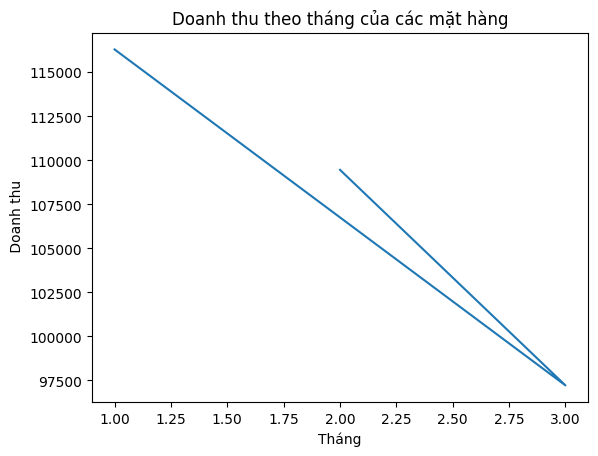

In [78]:
Revenuemonths = data.groupby(["Months"]).sum("cogs") #Lấy tổng doanh thu, chi phí, lợi nhuận nhóm theo tháng

x= data["Months"].unique() #Lấy giá trị các tháng thành một series

y= Revenuemonths["Total"] #Lấy tổng doanh thu trong 3 tháng
fig, ax = plt.subplots()

ax.plot(x, y) #Vẽ biểu đồ cột thể hiện doanh thu của 3 tháng

ax.set(title= "Doanh thu theo tháng của các mặt hàng", xlabel= "Tháng", ylabel= " Doanh thu") #Set label cho biểu đồ

# Doanh thu của tháng 1 là cao nhất, doanh thu của tháng 2 là thấp nhất


[Text(0.5, 1.0, 'Doanh thu theo từng sản phẩm'),
 Text(0.5, 0, ' Product'),
 Text(0, 0.5, 'Doanh thu ')]

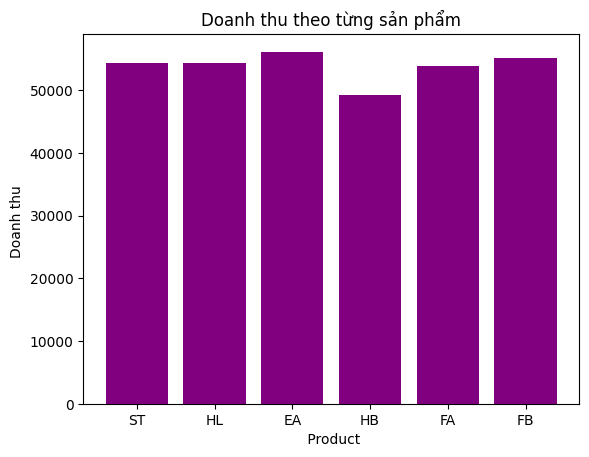

In [79]:
Revenueproduct= data.groupby(["Product line"]).sum("cogs")
x=data["Product line"].unique()

# Đổi tên các sản phẩm thành tên viết tắt để dễ hiển thị biểu đồ hơn
name = {"Sports and travel" : "ST","Home and lifestyle" : "HL", "Electronic accessories" : "EA", "Health and beauty" : "HB", "Fashion accessories" : "FA", "Food and beverages" : "FB" }

objects = [name.get(obj, obj) for obj in name]

y = Revenueproduct["Total"]

fig, ax = plt.subplots()
ax.bar(objects, y, color = "purple")

ax.set(title="Doanh thu theo từng sản phẩm", xlabel= " Product", ylabel= "Doanh thu ")
